In [18]:
# Import the libraries needed
from bs4 import BeautifulSoup
from collections import Counter
import itertools
import matplotlib as plt
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import pandas as pd
import random
import spacy
from spacy import displacy
from spacy.lang.en import English
from urllib.request import urlopen
import re
import requests
import seaborn as sns

In [2]:
nlp = spacy.load("en_core_web_sm")

## Importing Dataset

In [4]:
reviews = pd.read_json('../data/reviewSelected100.json', encoding='ISO-8859-1', lines=True)

## 3.2 Dataset Analysis

### Tokenisation and Stemming

In [5]:
# get reviews for a random business 
random_business = reviews.sample()
random_business_id = random_business.iloc[0]['business_id']
small_business_dataset = reviews.loc[reviews['business_id'] == random_business_id]
small_business_dataset.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
13210,OAbmJmMatnuft5l-x1RdCg,3Sf5BkLA2iaKbq8eYEKcNQ,wea6RrHSIheIjU_kUJVa4Q,5,0,0,0,Beverly nails is a wonderful nail salon! Thei...,2014-12-17 17:50:54
13256,evUdsr7u_6UjTl5ZT9Olbw,E9SDdEt8HbP5uXRxt2GHXg,wea6RrHSIheIjU_kUJVa4Q,1,0,1,0,I'm disappointed in my experience here. I came...,2016-05-07 04:43:01
13274,FpWR7YB6MBZsI4HTne1F1A,obK-qAtSK_bLiYTi0ydo5g,wea6RrHSIheIjU_kUJVa4Q,1,0,0,0,I went in a few days ago for a full set. I don...,2017-01-28 18:33:20
13277,mt3eFriDuutVD13LH6OzUQ,AuuJs_RTqdbYAxeBkgXlqQ,wea6RrHSIheIjU_kUJVa4Q,1,0,0,0,Horrible service!!! Ive been here a couple tim...,2016-03-17 22:48:59
13300,Kaedj7RNC-uAD2U7-rChug,WL3L_vKjf6ujdyd6sXKFNg,wea6RrHSIheIjU_kUJVa4Q,1,0,0,0,Definitely will not be back and should have tr...,2018-04-04 19:43:26


In [6]:
small_business_dataset_reviews = list(small_business_dataset['text'])

In [7]:
# convert the reviews into a concatenated string 
b1_review = ''.join(small_business_dataset_reviews)
clean_review = re.sub(r"[^A-Za-z0-9\s]+", "", b1_review)
b1_review = nlp(clean_review)

In [8]:
# removed punctuation and get the top 10 most common words (including stopwords)
b1_review_words = [token.text for token in b1_review if token.is_alpha == True] 
b1_word_freq = Counter(b1_review_words)
common_words = b1_word_freq.most_common(10)
print(common_words)

[('I', 528), ('and', 437), ('the', 418), ('to', 379), ('a', 301), ('my', 257), ('was', 227), ('of', 140), ('for', 139), ('in', 124)]


In [9]:
# removed punctuation and get the top 10 most common words (excluding stopwords)
b1_review_words = [token.text for token in b1_review if token.is_stop != True and token.is_alpha == True] 
b1_word_freq = Counter(b1_review_words)
common_words = b1_word_freq.most_common(10)
print(common_words)

[('nt', 113), ('nails', 107), ('pedicure', 62), ('place', 61), ('time', 55), ('polish', 53), ('nail', 49), ('job', 36), ('salon', 34), ('got', 34)]


,word,count
75,nt,113
1,nails,107
185,pedicure,62
167,place,61
97,time,55
...,...,...
879,beverly,1
880,elsewhereHad,1
883,Steven,1
885,powderSS,1


Text(0.5, 1.0, 'Distribution of Word Counts Before Stemming(log scale)')

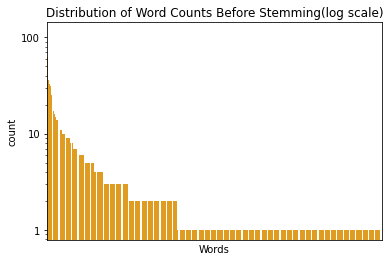

In [66]:
# log graph before stemming

df = pd.DataFrame(b1_word_freq.items(), columns=['word', 'count'])
df = df.sort_values(by=['count'], ascending=False)

ticks = [1, 10, 100]
figure = sns.barplot(data=df, x='word', y='count', color='orange')
figure.set_yscale("log") 
figure.set_yticks(ticks)
figure.set_yticklabels(ticks)
figure.set_xticks([])
figure.set_xticklabels([])
figure.set_xlabel('Words')
figure.set_title("Distribution of Word Counts Before Stemming (log scale)")

In [24]:
# now we do some stemming after removing the stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer

porter_st = PorterStemmer()
lancaster_st = LancasterStemmer()
snow_st = SnowballStemmer("english")

In [25]:
# Using Porter Stemmer
porter_stemmed_words = [porter_st.stem(word) for word in b1_review_words]
porter_freq = Counter(porter_stemmed_words)
porter_common = porter_freq.most_common(10)
print(porter_common)

[('nail', 168), ('nt', 113), ('pedicur', 78), ('time', 72), ('place', 71), ('polish', 55), ('ask', 47), ('want', 46), ('ladi', 46), ('salon', 42)]


Text(0.5, 1.0, 'Distribution of Word Counts After Stemming (log scale)')

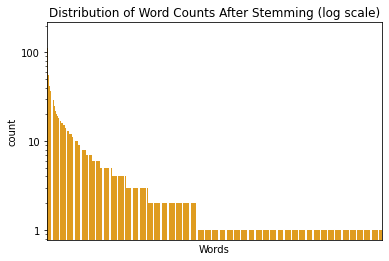

In [68]:
# log graph after stemming (porter stemmer)

df = pd.DataFrame(porter_freq.items(), columns=['word', 'count'])
df = df.sort_values(by=['count'], ascending=False)

ticks = [1, 10, 100]
figure = sns.barplot(data=df, x='word', y='count', color='orange')
figure.set_yscale("log") 
figure.set_yticks(ticks)
figure.set_yticklabels(ticks)
figure.set_xticks([])
figure.set_xticklabels([])
figure.set_xlabel('Words')
figure.set_title("Distribution of Word Counts After Stemming (log scale)")

In [35]:
# Using Lancaster Stemmer
lancaster_stemmed_words = [lancaster_st.stem(word) for word in b1_review_words]
lancaster_freq = Counter(lancaster_stemmed_words)
lancaster_common = lancaster_freq.most_common(10)
print(lancaster_common)

[('nail', 168), ('nt', 113), ('ped', 90), ('tim', 72), ('plac', 71), ('pol', 55), ('man', 55), ('ask', 47), ('want', 46), ('lady', 46)]


In [39]:
# Using Snowball Stemmer
snow_stemmed_words = [snow_st.stem(word) for word in b1_review_words]
snow_freq = Counter(snow_stemmed_words)
snow_common = snow_freq.most_common(10)
print(snow_common)

[('nail', 168), ('nt', 113), ('pedicur', 78), ('time', 72), ('place', 71), ('polish', 55), ('ask', 47), ('want', 46), ('ladi', 46), ('salon', 42)]


### POS Tagging

In [127]:
random_sentences = reviews.sample(5, random_state=42)
random_sentences = list(random_sentences['text'])

In [128]:
random_sentences[0]

"Que ce soit pour leurs délicieux bubbles tea/smooties, leurs ''Bánh mì'' , leurs petits snacks (viennoiseries, tapioca, ...), on adore Vua et aussi leurs prix très abordables. On y retourne lorsqu'on est dans le Quartier Latin !"

In [129]:
nltk_tagged = []
for sentence in random_sentences:
    nltk_tagged.append((nltk.pos_tag(word_tokenize.tokenize(sentence))))
nltk_tagged

[[('Que', 'NNP'),
  ('ce', 'NN'),
  ('soit', 'VBD'),
  ('pour', 'JJ'),
  ('leurs', 'NNS'),
  ('délicieux', 'VBP'),
  ('bubbles', 'NNS'),
  ('tea', 'JJ'),
  ('smooties', 'NNS'),
  ('leurs', 'VBP'),
  ('Bánh', 'NNP'),
  ('mì', 'NN'),
  ('leurs', 'VBZ'),
  ('petits', 'NNS'),
  ('snacks', 'NNS'),
  ('viennoiseries', 'NNS'),
  ('tapioca', 'VBP'),
  ('on', 'IN'),
  ('adore', 'NN'),
  ('Vua', 'NNP'),
  ('et', 'CC'),
  ('aussi', 'JJ'),
  ('leurs', 'NNS'),
  ('prix', 'VBP'),
  ('très', 'JJ'),
  ('abordables', 'NNS'),
  ('On', 'IN'),
  ('y', 'NN'),
  ('retourne', 'NN'),
  ('lorsqu', 'NN'),
  ('on', 'IN'),
  ('est', 'JJS'),
  ('dans', 'NNS'),
  ('le', 'VBP'),
  ('Quartier', 'NNP'),
  ('Latin', 'NNP')],
 [('As', 'IN'),
  ('I', 'PRP'),
  ('ve', 'VBP'),
  ('said', 'VBD'),
  ('previously', 'RB'),
  ('we', 'PRP'),
  ('ve', 'VBP'),
  ('been', 'VBN'),
  ('coming', 'VBG'),
  ('to', 'TO'),
  ('LMAH', 'NNP'),
  ('for', 'IN'),
  ('over', 'IN'),
  ('10', 'CD'),
  ('years', 'NNS'),
  ('At', 'IN'),
  ('least',

In [130]:
nlp = spacy.load("en_core_web_sm")
spacy_tagged = []
for sentence in random_sentences:
    spacy_tagged.append(nlp(sentence))
for tagged in spacy_tagged:
    for token in tagged:
        print(f'{token.text:{8}} {token.pos_:{6}}')

Que      PROPN 
ce       PROPN 
soit     ADJ   
pour     NOUN  
leurs    VERB  
délicieux NOUN  
bubbles  NOUN  
tea      NOUN  
/        SYM   
smooties NOUN  
,        PUNCT 
leurs    VERB  
''       PUNCT 
Bánh     PROPN 
mì       INTJ  
''       PUNCT 
,        PUNCT 
leurs    NOUN  
petits   VERB  
snacks   NOUN  
(        PUNCT 
viennoiseries NOUN  
,        PUNCT 
tapioca  INTJ  
,        PUNCT 
...      PUNCT 
)        PUNCT 
,        PUNCT 
on       ADP   
adore    PROPN 
Vua      PROPN 
et       PROPN 
aussi    PROPN 
leurs    VERB  
prix     NOUN  
très     ADJ   
abordables NOUN  
.        PUNCT 
On       ADP   
y        PROPN 
retourne VERB  
lorsqu'on PROPN 
est      PROPN 
dans     PROPN 
le       X     
Quartier PROPN 
Latin    PROPN 
!        PUNCT 
As       ADP   
I        PRON  
've      AUX   
said     VERB  
previously ADV   
...      PUNCT 
we've    PROPN 
been     AUX   
coming   VERB  
to       ADP   
LMAH     PROPN 
for      ADP   
over     ADP   
10       NUM 

# WORK COMPLETED UP TILL HERE.

### Writing Style

### search how to find a random url

In [139]:
# I think that the results of find_all might be more relevant but we can discuss this
page1 = requests.get('https://stackoverflow.com/questions/14413969/why-does-next-raise-a-stopiteration-but-for-do-a-normal-return') # def not inspired by any errors that we have been facing
soup1 = BeautifulSoup(page1.content, "html.parser")
text = list(soup1.find_all("p"))
text = [txt.get_text() for txt in text]
text

['Find centralized, trusted content and collaborate around the technologies you use most.',
 'Teams',
 'Q&A for work',
 'Connect and share knowledge within a single location that is structured and easy to search.',
 'In this piece of code, why does using for result in no StopIteration\nor is the for loop trapping all exceptions and then silently exiting?\nIn which case, why do we have the extraneous return?? Or is the\nraise StopIteration caused by: return None?',
 'Assuming StopIteration is being triggered by: return None.\nWhen is GeneratorExit generated?',
 'If I manually do a:',
 "In which case why don't I see a traceback?",
 'The for loop listens for StopIteration explicitly.',
 "The purpose of the for statement is to loop over the sequence provided by an iterator and the exception is used to signal that the iterator is now done; for doesn't catch other exceptions raised by the object being iterated over, just that one.",
 "That's because StopIteration is the normal, expected sign

In [133]:
page2 = urlopen('https://stackoverflow.com/questions/7239220/creating-an-array-of-structs-in-c')
html2 = page2.read().decode("utf-8")
soup2 = BeautifulSoup(html2, "html.parser")
text2 = soup2.get_text()
text2 = text2.replace('\n', ' ')
text2 = text2.replace('\r', ' ')
stackoverflow2 = text2

skipped this section because need to discuss

### Most-frequent (NN, JJ) pairs

In [134]:
rating1 = reviews.loc[reviews['stars'] == 1]
rating1 = rating1.sample(50)
rating1 = list(rating1['text'])

rating1 = [nlp(rating) for rating in rating1]

In [ ]:
doc = nlp("this food is the best thing I've had in a long time")
displacy.serve(doc, style="dep")


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



In [152]:
doc = nlp("good food, but service is mediocre")
displacy.serve(doc, style="dep")


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [ ]:
noun_adjective_pairs = []
for rating in rating1:
    

## DISCUSS!

In [140]:
# TODO 
noun_adjective_pairs = []
for rating in rating1:
    for i, token in enumerate(rating):
        if token.pos_ not in ('NOUN', 'PROPN'):
            continue
        for j in range(i + 1, len(rating)):
            if rating[j].pos_ == 'ADJ':
                noun_adjective_pairs.append((token, rating[j]))
                break
print(rating1[0])
noun_adjective_pairs[:10]

Consistently terrible service (even for a Denny's) at this location. I hadn't been for years because I have always had such awful service here, but after a winning streak at several surrounding Denny's, I thought I'd give "the bad Denny's" a try again.

Bad mistake. We left before even ordering food and I won't be back again. Went across the street to Olive Garden, which really knows how to elevate mediocre food with excellent service.

If you hate food, enjoy depressing scenes of humanity and waiting endlessly for service that doesn't arrive, this is the Denny's of your dreams.

All snotty snark aside, the server was very genuinely apologetic for the bad service. I actually felt bad for her. Just not bad enough to waste sixty dollars on awful food.

Nice try, Denny's.


[(service, such),
 (Denny, such),
 (location, such),
 (years, such),
 (service, several),
 (streak, several),
 (Denny, bad),
 (Denny, Bad),
 (try, Bad),
 (mistake, mediocre)]

## Jeth

lol i can't stand using nltk since it's slower than spacy so lemme put some spacy code here and we can also compare the results


## Indicative Adjective

In [136]:
# hi cloud, i need your linguistic knowledge to help me out here
def get_adjective_phrases(text):
    doc = nlp(text)
    phrases = []
    for token in doc:
        phrase = ''
        if (token.pos_ == 'ADJ') and (token.dep_ in ['dobj','pobj','nsubj','nsubjpass']):
            for subtoken in token.children:
                if (subtoken.pos_ == 'ADJ') or (subtoken.pos_ == 'ADV') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '
            if len(phrase)!=0:
                phrase += token.text
        if  len(phrase)!=0:
            phrases.append(phrase)
    return phrases

In [137]:
adjective_phrases = get_adjective_phrases(clean_review)
adjective_phrases[:10]

['cooked poor',
 'empty handed',
 'very good',
 'so much',
 'probably best',
 'just as bad',
 'as much',
 'little pricey']

In [138]:
indicative_phrases = Counter(adjective_phrases).most_common(10)
indicative_phrases

[('cooked poor', 1),
 ('empty handed', 1),
 ('very good', 1),
 ('so much', 1),
 ('probably best', 1),
 ('just as bad', 1),
 ('as much', 1),
 ('little pricey', 1)]

i think the above can be turned into a function so that it takes in a random business id and it returns the most common phrases: to be discussed